In [14]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
!pip install tensorflow==2.0.0-beta0

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.python.keras import layers
from tensorflow.python.keras import Model
import keras
from tensorflow.keras import models

from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from keras.utils import np_utils
%matplotlib inline

mnist = tf.keras.datasets.mnist

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

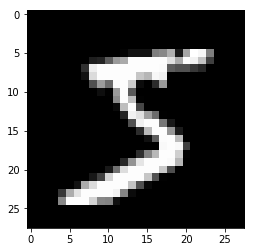

In [4]:
plt.imshow(X_train[0], cmap='gray')

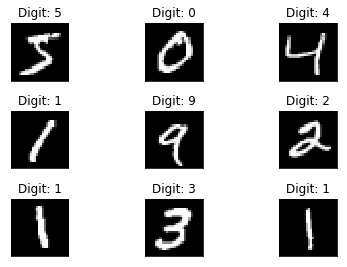

In [5]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1) / X_train.max()
X_test = X_test.reshape(10000, 28, 28, 1) / X_test.max()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

W0613 17:12:20.729147 140085002807168 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.1483 - accuracy: 0.9548
Epoch 2/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0492 - accuracy: 0.9848
Epoch 3/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0354 - accuracy: 0.9891
Epoch 4/5
60000/60000 [==============================] - 65s 1ms/sample - loss: 0.0272 - accuracy: 0.9915
Epoch 5/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0217 - accuracy: 0.9927


In [10]:
test_scores = model.evaluate(X_test, y_test)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

10000/10000 [==============================] - 4s 383us/sample - loss: 0.0328 - accuracy: 0.9904
Test loss: 0.0327563678877239
Test accuracy: 0.9904


In [0]:
predictions = model.predict_classes(X_test)

In [12]:
print('Classification Report: ')
print(classification_report(y_test, predictions))
print('\n')
print('Confusion Matrix: ')
cm = confusion_matrix(y_test, predictions)
print(cm)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Confusion Matrix: 
[[ 972    0    1    0    1    0    0    3    0    3]
 [   0 1133    0    2    0    0    0    0    0    0]
 [   1    0 1026    1    0    0    0    4    0    0]
 [   0    0    0  999    0    2    0 

In [0]:
model.save('BasicMNISTModel.h5')